# Simple Crime Investigation

Goal: Print six scatterplots (1 per district) showing the number of crimes (y-axis) per day (x-axis) for entries dated from January 1 to 10 in each specific district.

In [171]:
# Import the important python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
# Read and initialize the dataset that will be used
crime_data = pd.read_csv('crime.csv')
crime_data

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1/1/2006 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1/1/2006 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,1/1/2006 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,1/1/2006 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,1/1/2006 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613
...,...,...,...,...,...,...,...,...,...
7579,1/31/2006 23:36,26TH ST / G ST,3,3B,728,594(B)(2)(A) VANDALISM/ -$400,2999,38.577832,-121.470460
7580,1/31/2006 23:40,4011 FREEPORT BLVD,4,4A,957,459 PC BURGLARY BUSINESS,2203,38.537591,-121.492591
7581,1/31/2006 23:41,30TH ST / K ST,3,3C,841,TRAFFIC-ACCIDENT INJURY,5400,38.572030,-121.467012
7582,1/31/2006 23:45,5303 FRANKLIN BLVD,4,4B,969,3056 PAROLE VIO - I RPT,7000,38.527187,-121.471248


In [173]:
# Check the data types of each variable
crime_data.dtypes

cdatetime         object
address           object
district           int64
beat              object
grid               int64
crimedescr        object
ucr_ncic_code      int64
latitude         float64
longitude        float64
dtype: object

In [174]:
# Since we need to extract the date, convert the object into datetime 
crime_data['cdatetime'] = pd.to_datetime(crime_data['cdatetime'])

In [175]:
# Check the conversation is successful
crime_data.dtypes

cdatetime        datetime64[ns]
address                  object
district                  int64
beat                     object
grid                      int64
crimedescr               object
ucr_ncic_code             int64
latitude                float64
longitude               float64
dtype: object

In [176]:
# Select and filter the data, wherein we should select all the crimes from January 1-10
filtered_crime_data = crime_data[(crime_data['cdatetime'].dt.month == 1) & (crime_data['cdatetime'].dt.day <= 10)]
filtered_crime_data

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,2006-01-01 00:00:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,2006-01-01 00:00:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,2006-01-01 00:00:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,2006-01-01 00:00:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,2006-01-01 00:00:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613
...,...,...,...,...,...,...,...,...,...
2333,2006-01-10 23:35:00,6440 FIELDALE DR,5,5C,1661,TOWED/STORED VEHICLE,7000,38.438098,-121.429271
2334,2006-01-10 23:36:00,BOXWOOD ST / EL CAMINO AVE,2,2C,564,11350(A)HS POSS CNTRL SUBST,3532,38.611120,-121.446194
2335,2006-01-10 23:57:00,MOREY AVE / ALTOS AVE,2,2A,512,10851 VC AUTO THEFT LOCATE,2404,38.634727,-121.447873
2336,2006-01-10 23:59:00,1770 59TH AVE,4,4B,1351,459 PC BURGLARY RESIDENCE,2204,38.497084,-121.497306


In [177]:
# Select and filter again the Data, wherein we need to extract the crime incident from district 1
district1_filtered_crime_data = filtered_crime_data[filtered_crime_data['district'] == 1][['cdatetime','district']]

# Convert the dataset into m-d format for better output
district1_filtered_crime_data['cdatetime'] = district1_filtered_crime_data['cdatetime'].dt.strftime('%m-%d')

# Display the data
district1_filtered_crime_data

,cdatetime,district
9,01-01,1
35,01-01,1
36,01-01,1
39,01-01,1
40,01-01,1
...,...,...
2297,01-10,1
2306,01-10,1
2317,01-10,1
2319,01-10,1


In [178]:
# Group the data according to their date in m-d format
district1_grouped_data = district1_filtered_crime_data.groupby('cdatetime').size().reset_index(name='incident_count')

#Rename the column name since time is already removed

district1_grouped_data.rename(columns={'cdatetime': 'cdate'}, inplace=True)
# Display the grouped data

district1_grouped_data

,cdate,incident_count
0,01-01,40
1,01-02,21
2,01-03,29
3,01-04,29
4,01-05,26
5,01-06,32
6,01-07,26
7,01-08,21
8,01-09,30
9,01-10,31


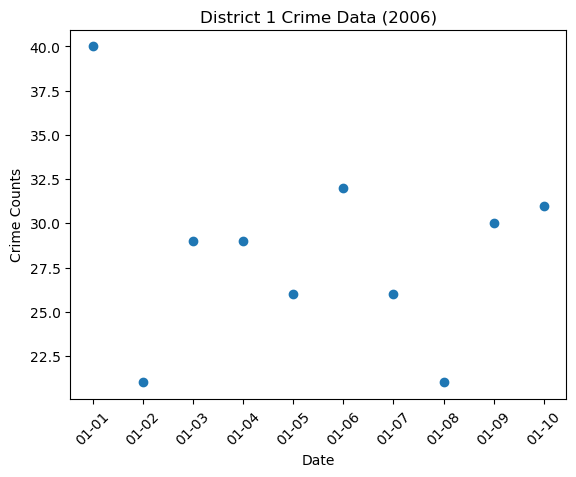

In [179]:
# Create a scatter plot for District 1
plt.scatter(district1_grouped_data['cdate'], district1_grouped_data['incident_count'])
plt.xticks(rotation=45)
plt.title('District 1 Crime Data (2006)')
plt.xlabel('Date')
plt.ylabel("Crime Counts")
plt.show()

In [180]:
# Copy and paste the code from district 1 and just change it into district 2 to extract the data from the said district
district2_filtered_crime_data = filtered_crime_data[filtered_crime_data['district'] == 2][['cdatetime','district']]
district2_filtered_crime_data['cdatetime'] = district2_filtered_crime_data['cdatetime'].dt.strftime('%m-%d')
district2_grouped_data = district2_filtered_crime_data.groupby('cdatetime').size().reset_index(name='incident_count')
district2_grouped_data.rename(columns={'cdatetime': 'cdate'}, inplace=True)

# Display the data
district2_grouped_data

,cdate,incident_count
0,01-01,58
1,01-02,37
2,01-03,55
3,01-04,42
4,01-05,49
5,01-06,48
6,01-07,44
7,01-08,37
8,01-09,50
9,01-10,59


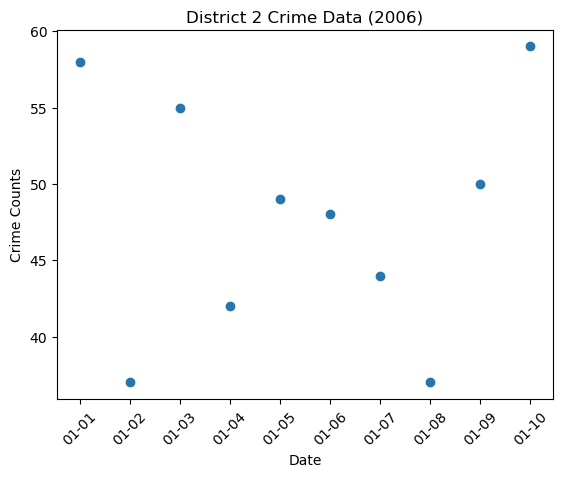

In [181]:
# Create a scatter plot for District 2
plt.scatter(district2_grouped_data['cdate'], district2_grouped_data['incident_count'])
plt.xticks(rotation=45)
plt.title('District 2 Crime Data (2006)')
plt.xlabel('Date')
plt.ylabel("Crime Counts")
plt.show()

In [182]:
# Copy and paste the code from district 2 and just change it into district 3 to extract the data from the said district
district3_filtered_crime_data = filtered_crime_data[filtered_crime_data['district'] == 3][['cdatetime','district']]
district3_filtered_crime_data['cdatetime'] = district3_filtered_crime_data['cdatetime'].dt.strftime('%m-%d')
district3_grouped_data = district3_filtered_crime_data.groupby('cdatetime').size().reset_index(name='incident_count')
district3_grouped_data.rename(columns={'cdatetime': 'cdate'}, inplace=True)

# Display the data
district3_grouped_data

,cdate,incident_count
0,01-01,52
1,01-02,33
2,01-03,64
3,01-04,46
4,01-05,46
5,01-06,48
6,01-07,47
7,01-08,33
8,01-09,50
9,01-10,45


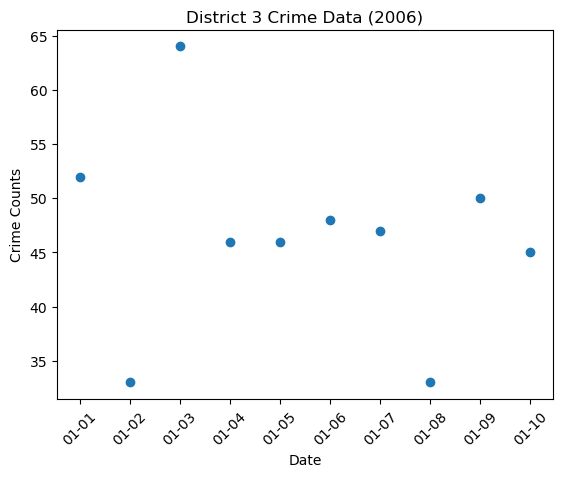

In [183]:
# Create a scatter plot for District 3
plt.scatter(district3_grouped_data['cdate'], district3_grouped_data['incident_count'])
plt.xticks(rotation=45)
plt.title('District 3 Crime Data (2006)')
plt.xlabel('Date')
plt.ylabel("Crime Counts")
plt.show()

In [184]:
# Copy and paste the code from district 3 and just change it into district 4 to extract the data from the said district
district4_filtered_crime_data = filtered_crime_data[filtered_crime_data['district'] == 4][['cdatetime','district']]
district4_filtered_crime_data['cdatetime'] = district4_filtered_crime_data['cdatetime'].dt.strftime('%m-%d')
district4_grouped_data = district4_filtered_crime_data.groupby('cdatetime').size().reset_index(name='incident_count')
district4_grouped_data.rename(columns={'cdatetime': 'cdate'}, inplace=True)

# Display the data
district4_grouped_data

,cdate,incident_count
0,01-01,26
1,01-02,16
2,01-03,35
3,01-04,54
4,01-05,38
5,01-06,36
6,01-07,37
7,01-08,23
8,01-09,40
9,01-10,29


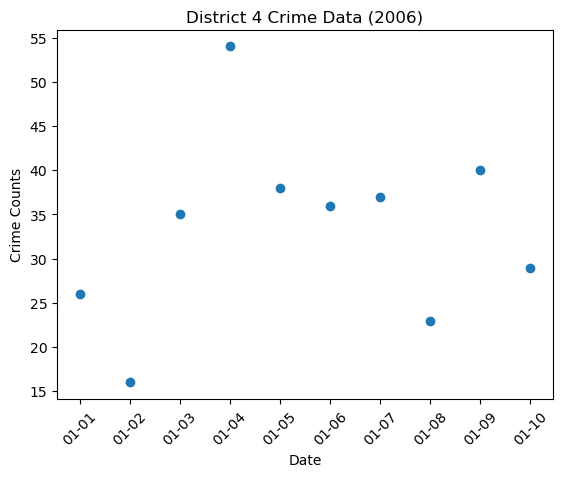

In [185]:
# Create a scatter plot for District 4
plt.scatter(district4_grouped_data['cdate'], district4_grouped_data['incident_count'])
plt.xticks(rotation=45)
plt.title('District 4 Crime Data (2006)')
plt.xlabel('Date')
plt.ylabel("Crime Counts")
plt.show()

In [186]:
# Copy and paste the code from district 4 and just change it into district 5 to extract the data from the said district
district5_filtered_crime_data = filtered_crime_data[filtered_crime_data['district'] == 5][['cdatetime','district']]
district5_filtered_crime_data['cdatetime'] = district5_filtered_crime_data['cdatetime'].dt.strftime('%m-%d')
district5_grouped_data = district5_filtered_crime_data.groupby('cdatetime').size().reset_index(name='incident_count')
district5_grouped_data.rename(columns={'cdatetime': 'cdate'}, inplace=True)

# Display the data
district5_grouped_data

,cdate,incident_count
0,01-01,35
1,01-02,19
2,01-03,40
3,01-04,46
4,01-05,36
5,01-06,29
6,01-07,38
7,01-08,31
8,01-09,39
9,01-10,34


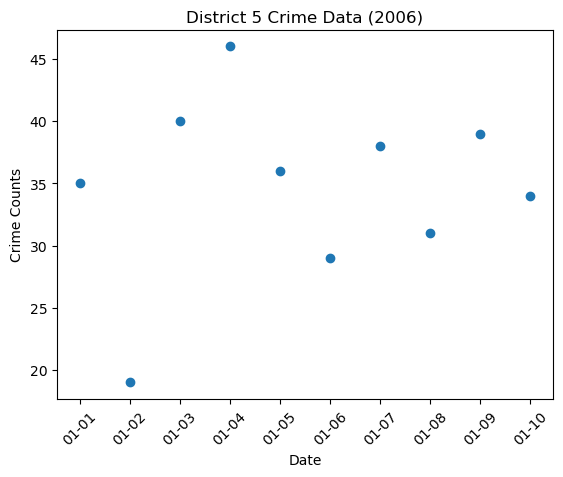

In [187]:
# Create a scatter plot for District 5
plt.scatter(district5_grouped_data['cdate'], district5_grouped_data['incident_count'])
plt.xticks(rotation=45)
plt.title('District 5 Crime Data (2006)')
plt.xlabel('Date')
plt.ylabel("Crime Counts")
plt.show()

In [188]:
# Copy and paste the code from district 5 and just change it into district 6 to extract the data from the said district
district6_filtered_crime_data = filtered_crime_data[filtered_crime_data['district'] == 6][['cdatetime','district']]
district6_filtered_crime_data['cdatetime'] = district6_filtered_crime_data['cdatetime'].dt.strftime('%m-%d')
district6_grouped_data = district6_filtered_crime_data.groupby('cdatetime').size().reset_index(name='incident_count')
district6_grouped_data.rename(columns={'cdatetime': 'cdate'}, inplace=True)

# Display the data
district6_grouped_data

,cdate,incident_count
0,01-01,39
1,01-02,19
2,01-03,33
3,01-04,40
4,01-05,73
5,01-06,40
6,01-07,50
7,01-08,37
8,01-09,52
9,01-10,46


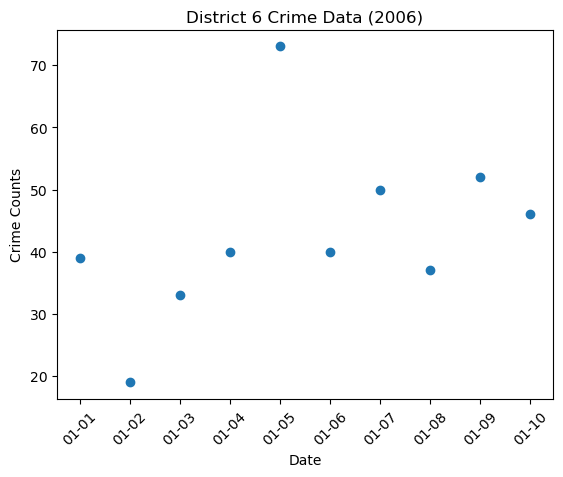

In [189]:
# Create a scatter plot for District 6
plt.scatter(district6_grouped_data['cdate'], district6_grouped_data['incident_count'])
plt.xticks(rotation=45)
plt.title('District 6 Crime Data (2006)')
plt.xlabel('Date')
plt.ylabel("Crime Counts")
plt.show()

# Final Ouput

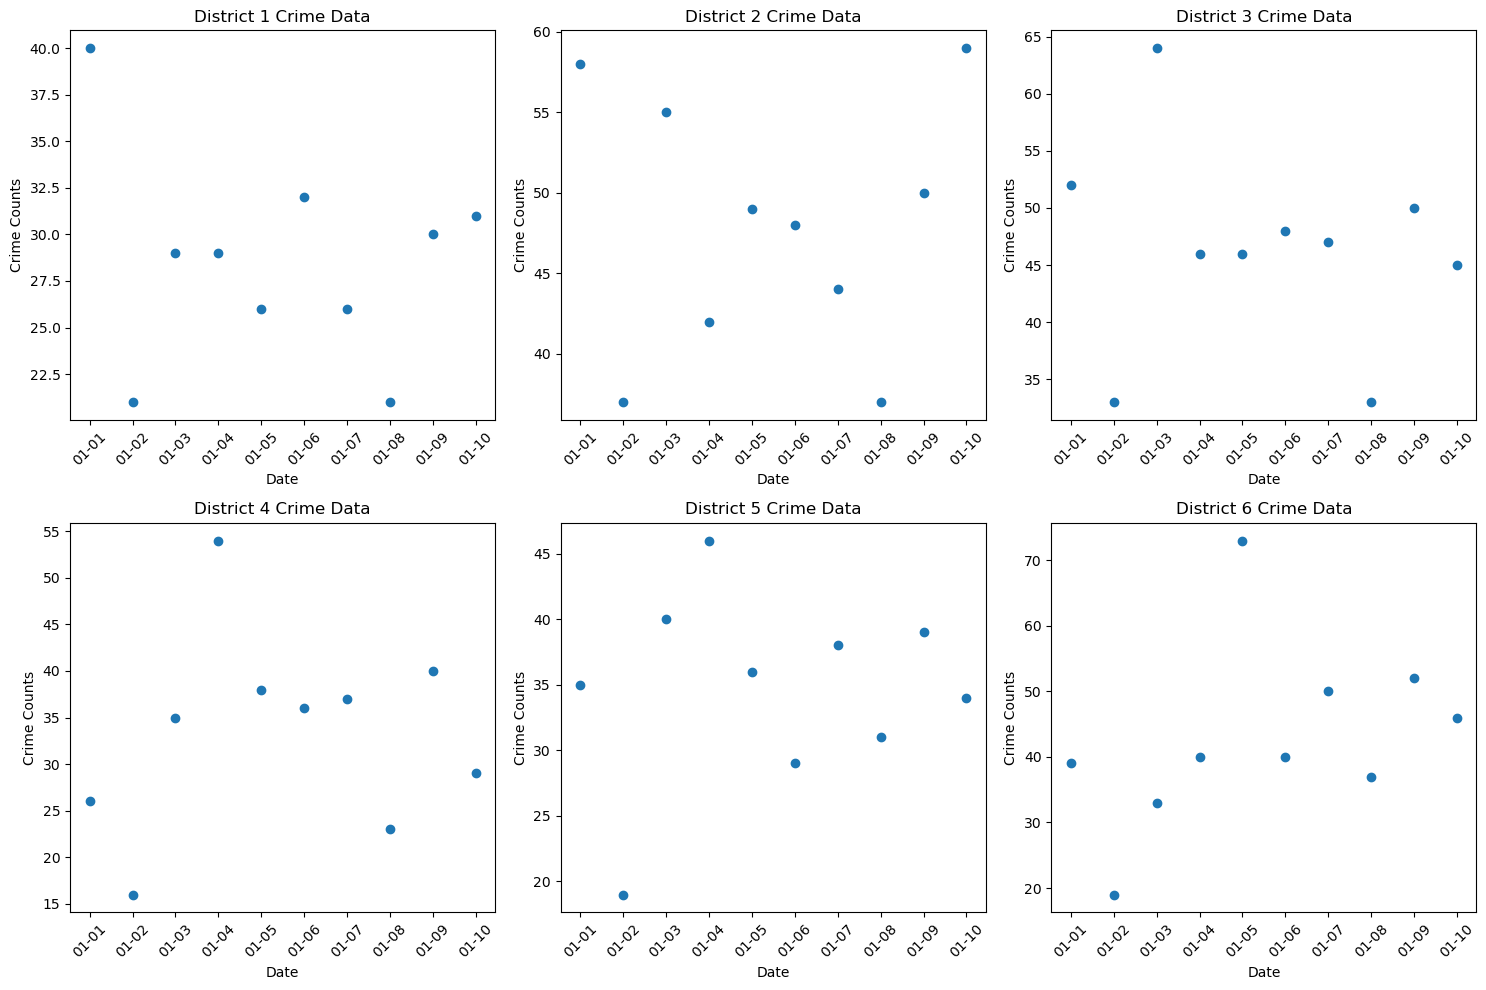

In [193]:
# Create a list that contains the data on each district
crime_per_district = [district1_grouped_data, district2_grouped_data, district3_grouped_data, 
                       district4_grouped_data, district5_grouped_data, district6_grouped_data]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axs array so that we can iterate through it easily
axs = axs.flatten()

# Loop through each district's data and create a scatter plot on its corresponding subplot
for idx, (district_crime_data, ax) in enumerate(zip(crime_per_district, axs)):
    ax.scatter(district_crime_data['cdate'], district_crime_data['incident_count'])
    ax.set_xticks(district_crime_data['cdate'])
    ax.set_xticklabels(district_crime_data['cdate'], rotation=45)
    ax.set_title(f'District {idx+1} Crime Data')
    ax.set_xlabel('Date')
    ax.set_ylabel('Crime Counts')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Examining the scatterplots, it becomes evident that the peak occurrence of a crime within a single day is documented in District 6 on January 5. Conversely, the lowest crime incident is noted in District 4 on January 2. Moreover, when considering the period from January 1 to 10, District 2 exhibits the highest frequency of crimes, whereas District 5 displays the lowest rate of criminal incidents.